In [ ]:
'''
Lung & Colon Cancer Image Classification - CNN Model

- Type: Lung
- Classes: 3 (benign, adenocarcinoma, squamous cell carcinoma)
- Num Epochs: 15
- Data Processing: Train-Validation-Test Split
'''

In [2]:
import os
import random
import tensorflow as tf

In [6]:
lung_aca_path = "lung_colon_image_set/lung_image_sets/lung_aca"
lung_n_path = "lung_colon_image_set/lung_image_sets/lung_n"
lung_scc_path = "lung_colon_image_set/lung_image_sets/lung_scc"

lung_aca_files = [(lung_aca_path + "/", i) for i in os.listdir(lung_aca_path)]
lung_n_files = [(lung_n_path + "/", i) for i in os.listdir(lung_n_path)]
lung_scc_files = [(lung_scc_path + "/", i) for i in os.listdir(lung_scc_path)]

all_files = [lung_aca_files, lung_n_files, lung_scc_files]

In [7]:
# Data Processing - Training-Validation-Test Set Splitting

def train_validate_test_split(files):
    for _ in range(10):
        random.shuffle(files)
        
    train = files[:(int)(5000*0.8)]                 # 80%
    valid = files[(int)(5000*0.8):(int)(5000*0.9)]  # 10%
    test = files[(int)(5000*0.9):]                  # 10%
    return train, valid, test

In [8]:
def makeDirectories(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [9]:
TRAIN_PATH = "lungTrain-paper"
VALID_PATH = "lungValid-paper"
TEST_PATH = "lungTest-paper"

makeDirectories(TRAIN_PATH)
makeDirectories(VALID_PATH)
makeDirectories(TEST_PATH)

In [10]:
import shutil

def copyAndMoveFiles(directoryLst, destPath):
    for filePath, imgName in directoryLst:
        source = filePath + imgName
        destination = destPath
        shutil.copy(source, destination)

In [11]:
def makeFilesAndClasses(fileLst, className):
    trainClass, validClass, testClass = train_validate_test_split(fileLst)
    makeDirectories(TRAIN_PATH + '/' + className)
    copyAndMoveFiles(trainClass, TRAIN_PATH + '/' + className)
    makeDirectories(VALID_PATH + '/' + className)
    copyAndMoveFiles(validClass, VALID_PATH + '/' + className)
    makeDirectories(TEST_PATH + '/' + className)
    copyAndMoveFiles(testClass, TEST_PATH + '/' + className)

In [12]:
classLabels = ['lung_aca', 'lung_n', 'lung_scc']

for i in range(len(all_files)):
    filesForClass = all_files[i]
    makeFilesAndClasses(filesForClass, classLabels[i])

In [13]:
image_data = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
    )

In [14]:
img_size = 150
batch_size = 32

train = image_data.flow_from_directory(TRAIN_PATH, target_size=(img_size,img_size), 
                                       batch_size=batch_size, color_mode='rgb', shuffle = True)

val = image_data.flow_from_directory(VALID_PATH, target_size=(img_size,img_size), 
                                     batch_size=batch_size, color_mode='rgb', shuffle = True)

Found 12000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(3)
    ])

In [16]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [17]:
history = model.fit(train, epochs=15, verbose = 1, validation_data=val)

Epoch 1/15
375/375 [==============================] - 235s 619ms/step - loss: 0.4534 - accuracy: 0.7834 - val_loss: 0.2994 - val_accuracy: 0.8827
Epoch 2/15
375/375 [==============================] - 222s 591ms/step - loss: 0.3057 - accuracy: 0.8737 - val_loss: 0.2480 - val_accuracy: 0.9000
Epoch 3/15
375/375 [==============================] - 212s 564ms/step - loss: 0.2599 - accuracy: 0.8876 - val_loss: 0.2544 - val_accuracy: 0.8893
Epoch 4/15
375/375 [==============================] - 219s 583ms/step - loss: 0.2337 - accuracy: 0.9043 - val_loss: 0.2548 - val_accuracy: 0.8887
Epoch 5/15
375/375 [==============================] - 218s 580ms/step - loss: 0.2133 - accuracy: 0.9140 - val_loss: 0.2000 - val_accuracy: 0.9187
Epoch 6/15
375/375 [==============================] - 217s 580ms/step - loss: 0.1957 - accuracy: 0.9213 - val_loss: 0.2070 - val_accuracy: 0.9140
Epoch 7/15
375/375 [==============================] - 221s 589ms/step - loss: 0.1870 - accuracy: 0.9243 - val_loss: 0.1702 -

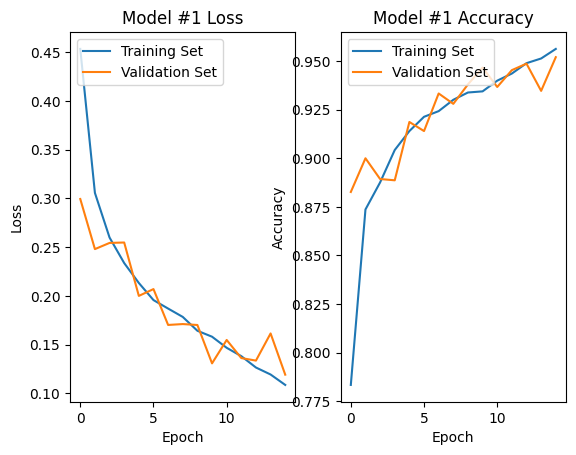

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# display results
plt.subplot(1, 2, 1)
plt.title('Model #1 Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Set','Validation Set'], loc='upper left')

plt.subplot(1, 2, 2)
plt.title('Model #1 Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'], loc='upper left')

plt.show()

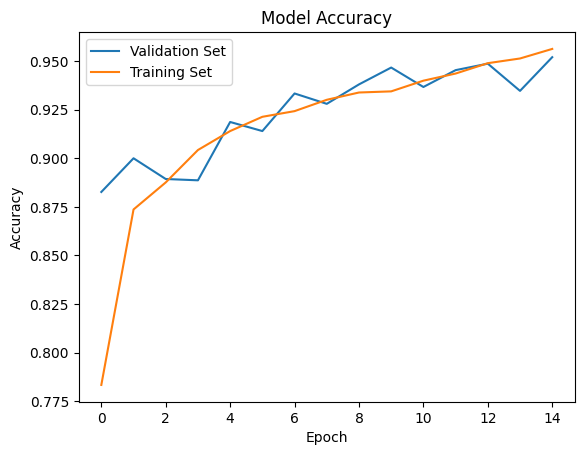

In [62]:
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Set', 'Training Set'], loc='upper left')

In [22]:
image_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
    )

In [20]:
test = image_data1.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                     batch_size=1, color_mode='rgb', shuffle = True)

Found 1500 images belonging to 3 classes.


In [21]:
acc = model.evaluate(test)
print(f'The test set accuracy is {acc}\%.')

1500/1500 [==============================] - 20s 13ms/step - loss: 0.1262 - accuracy: 0.9413
The test set accuracy is [0.1261844038963318, 0.9413333535194397]\%.


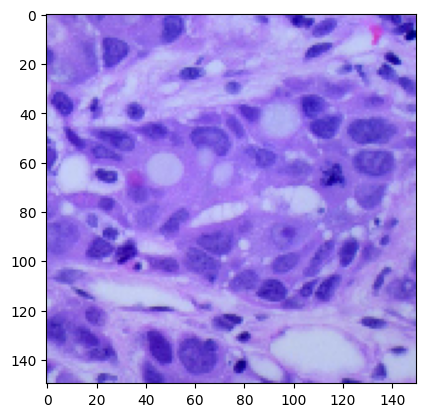

[[1. 0. 0.]]
1/1 [==============================] - 0s 31ms/step
[[ 4.5272517 -9.849306   1.902295 ]]


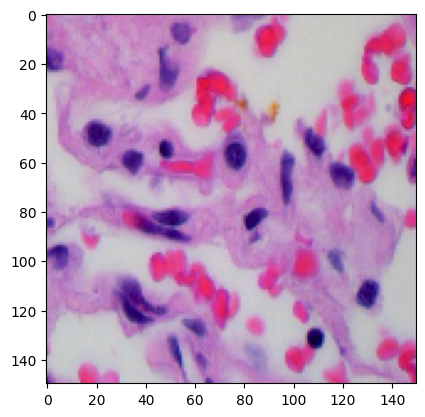

[[0. 1. 0.]]
1/1 [==============================] - 0s 37ms/step
[[  1.3738575  18.027628  -20.051556 ]]


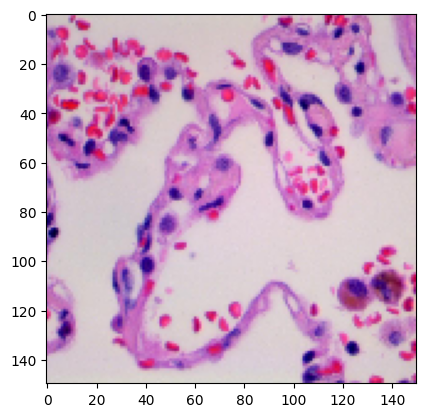

[[0. 1. 0.]]
1/1 [==============================] - 0s 41ms/step
[[ -1.449402  23.425932 -22.162748]]


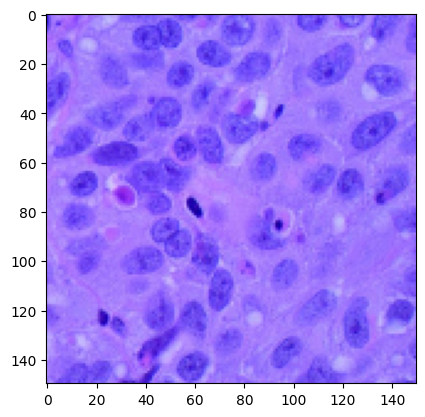

[[0. 0. 1.]]
1/1 [==============================] - 0s 30ms/step
[[  3.2749171 -22.493477    8.730723 ]]


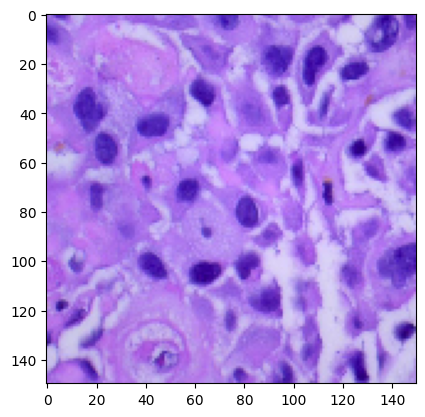

[[0. 0. 1.]]
1/1 [==============================] - 0s 33ms/step
[[ 2.8444054 -6.9613504  1.2840924]]


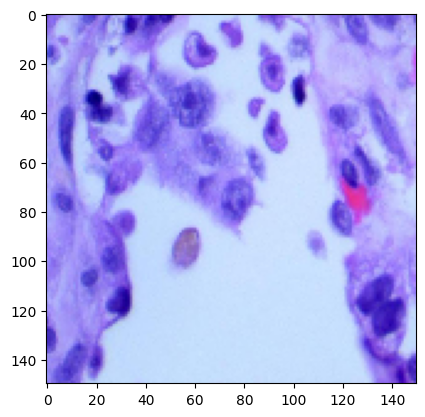

[[1. 0. 0.]]
1/1 [==============================] - 0s 41ms/step
[[ 7.1115823 -2.9625988 -5.891531 ]]


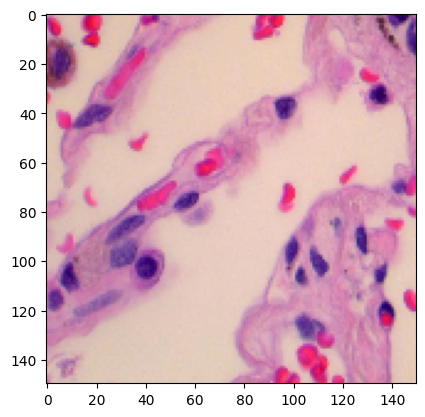

[[0. 1. 0.]]
1/1 [==============================] - 0s 32ms/step
[[ -4.7098455  27.570026  -23.479239 ]]


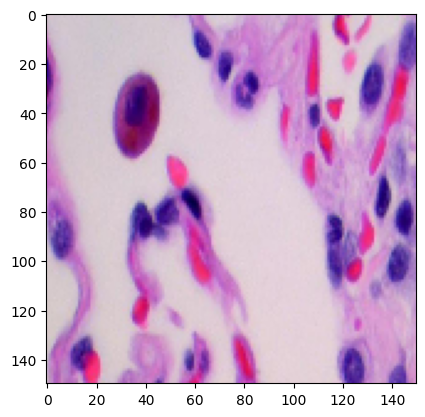

[[0. 1. 0.]]
1/1 [==============================] - 0s 29ms/step
[[ -1.1796272  18.78448   -17.891306 ]]


In [25]:
for _ in range(8):
    img, label = test.next()
    plt.imshow(img[0])
    plt.show()
    print(str(label))
    print(model.predict(img))   